# 2024_AI_BU_04

다음의 코드는 유전 알고리즘을 통해 파란 선의 -20 부터 +20 구간 내에서 가장 큰 지점을 찾습니다. 잘 된 예시와 유사하게, 모든 인구(population)가 구간 내에서 가장 높은 봉우리 주변에 모일 수 있도록 아래의 세 파라미터를 수정하세요. 수정한 내용을 설명하는 주석을 코드 내에 작성하세요. 수정한 뒤, 코드를 실행해 결과 화면을 보이고, 저장하여 제출하세요. 지정된 세 가지 파라미터 외의 다른 부분은 수정하지 마세요.


### 잘 된 예시
<div>
<img src="https://share.cleanshot.com/9MwHT8Ln+" width="300px"/>
</div>

### 잘못된 예시
<div>
<img src="https://share.cleanshot.com/TRy3lJcq+" width="300px"/>
</div>

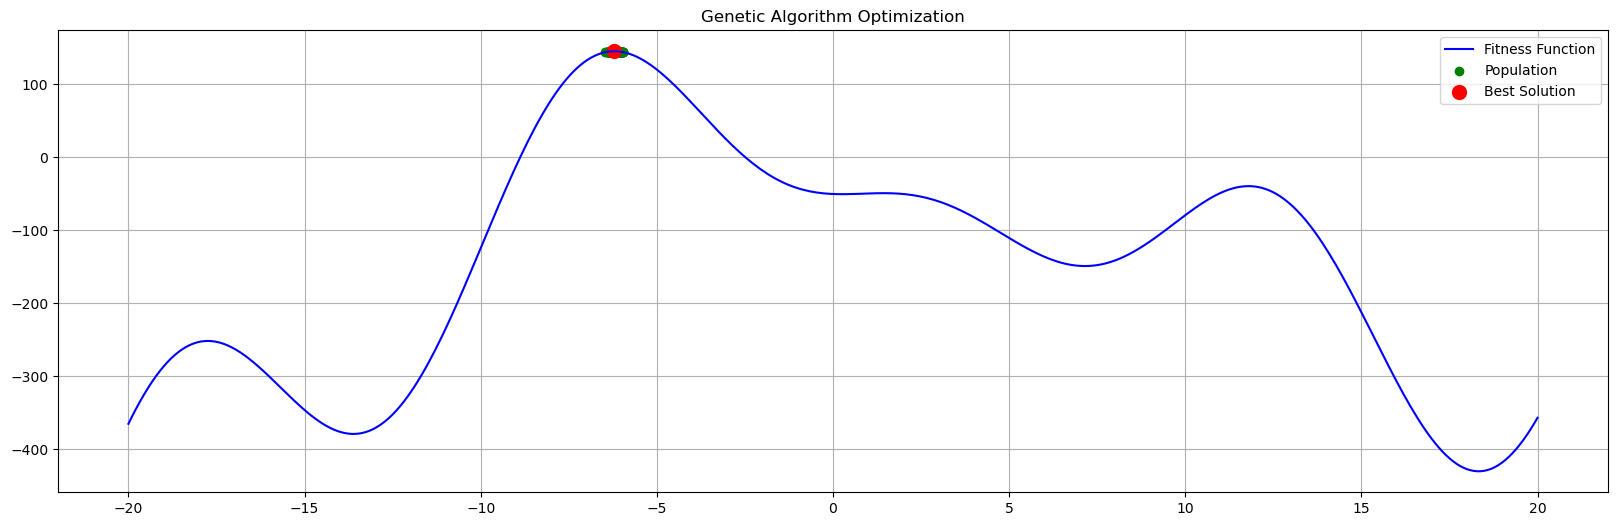

In [1]:
# %%
import numpy as np
import matplotlib.pyplot as plt

# Define the fitness function
def fitness_function(x):
    x = x + 5
    return 120 * np.cos(0.4 * x) - 80 * np.sin(0.6 * x) + 50 * np.sin(0.2 * x) + 0.05 * x**3 - 1.5 * x**2

# Parameters for the genetic algorithm
# Q1. 이 부분의 세 가지 파라미터를 변경하여 최적점에 가까운 하나의 봉우리에 모든 결과값이 수렴할 수 있도록 수정하고, 수정한 이유를 주석으로 설명하세요.
population_size = 100  # 개체 수를 증가시켜 다양성을 확보하고 탐색 범위를 넓혔습니다.
num_generations = 5   # 세대 수를 늘려 더 많은 반복을 통해 안정적인 수렴을 유도했습니다.
mutation_rate = 0.01   # 돌연변이 확률을 높여 지역 최적점에서 벗어날 가능성을 증가시켰습니다.

# Generate initial population
population = np.random.uniform(-15, 10, population_size)

# Genetic Algorithm
for generation in range(num_generations):
    # Evaluate fitness
    fitness = fitness_function(population)

    # Selection (select top 50% individuals)
    sorted_indices = np.argsort(fitness)
    population = population[sorted_indices]
    population = population[len(population) // 2 :]

    # Crossover (create new population)
    offspring = []
    for i in range(population_size - len(population)):
        parent1 = np.random.choice(population)
        parent2 = np.random.choice(population)
        child = (parent1 + parent2) / 2
        offspring.append(child)
    population = np.concatenate((population, offspring))

    # Mutation
    for i in range(len(population)):
        if np.random.uniform() < mutation_rate:
            population[i] += np.random.uniform(-2, 2)

# Final evaluation
fitness = fitness_function(population)
best_solution = population[np.argmax(fitness)]
best_fitness = np.max(fitness)

# Plotting the results with matplotlib
x = np.linspace(-20, 20, 400)
y = fitness_function(x)

plt.figure(figsize=(20,6))
plt.plot(x, y, label="Fitness Function", color='blue')
plt.scatter(population, fitness_function(population), color='green', label="Population")
plt.scatter([best_solution], [best_fitness], color='red', s=100, label="Best Solution")

plt.title("Genetic Algorithm Optimization")
plt.legend()
plt.grid(True)
plt.show()
